In [1]:
import urllib.request
import pandas as pd
import re
from konlpy.tag import Okt
from collections import Counter
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from wordcloud import WordCloud

In [2]:
#네이버 쇼핑 리뷰 데이터
urllib.request.urlretrieve("https://raw.githubusercontent.com/bab2min/corpus/master/sentiment/naver_shopping.txt", filename="ratings_total.txt")

('ratings_total.txt', <http.client.HTTPMessage at 0x23c11671250>)

In [3]:
total_data = pd.read_table('ratings_total.txt', names=['ratings', 'reviews'])
total_data

,ratings,reviews
0,5,배공빠르고 굿
1,2,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고
2,5,아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...
3,2,선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...
4,5,민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ
...,...,...
199995,2,장마라그런가!!! 달지않아요
199996,5,다이슨 케이스 구매했어요 다이슨 슈퍼소닉 드라이기 케이스 구매했어요가격 괜찮고 배송...
199997,5,로드샾에서 사는것보다 세배 저렴하네요 ㅜㅜ 자주이용할께요
199998,5,넘이쁘고 쎄련되보이네요~


In [4]:
total_data["ratings"].unique()

array([5, 2, 1, 4], dtype=int64)

In [5]:
total_data.isnull().sum()

ratings    0
reviews    0
dtype: int64

In [6]:
ratings_1_data = []
ratings_2_data = []
ratings_4_data = []
ratings_5_data = []

group_data = total_data.groupby("ratings")
for name, group in group_data:
    if name == 1:
        ratings_1_data.append(group)
    elif name == 2:
        ratings_2_data.append(group)
    elif name == 4:
        ratings_4_data.append(group)
    elif name == 5:
        ratings_5_data.append(group)

# 하나의 DataFrame으로 병합(List안에 DataFrame이 들어가 있음) , isinstance(review, str) 이러한 방법도 가능
ratings_1_data = pd.concat(ratings_1_data)
ratings_2_data = pd.concat(ratings_2_data)
ratings_4_data = pd.concat(ratings_4_data)
ratings_5_data = pd.concat(ratings_5_data)


print("Ratings 1 data:\n", ratings_1_data)
print("Ratings 2 data:\n", ratings_2_data)
print("Ratings 4 data:\n", ratings_4_data)
print("Ratings 5 data:\n", ratings_5_data)


Ratings 1 data:
         ratings                                            reviews
6             1  주문을 11월6에 시켰는데 11월16일에 배송이 왔네요 ㅎㅎㅎ 여기 회사측과는 전화...
17            1                                     실내에서 신는건지 몰랐어요
22            1                 남자 애들 인데 너무 좋아요 유해성분없어 초등들도 바르기좋아요
27            1                        저렴해서 구매 했지만 바지 완성도 떨어짐~~^^;
29            1                                    양은 많은데 맛은 없었습니다
...         ...                                                ...
199972        1                    내용물이 안나와요 ㅜㅜ 무용지물 ㅜㅜ 여러개 샀는데 ㅜㅜ
199977        1                                      의자슈즈를 사용해야해요.
199979        1                                      작동안함 뽑기가잘못됫나?
199985        1                                     별로에요 진짜 ㅠ 너무하네
199989        1                 올때 박스하나가.입구부분이뜯어져서왔어요 다음엔 안사려고요...

[36048 rows x 2 columns]
Ratings 2 data:
         ratings                                            reviews
1             2                      택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고
3 

In [27]:
reviews = ""
for idx, row in ratings_1_data.iterrows():
    if "reviews" in row.keys():
        cleaned_review = re.sub(r"[^\w]", " ", row["reviews"])
        reviews += cleaned_review + " "  

reviews = reviews.strip()

In [31]:
nlp = Okt()
message_N = nlp.nouns(reviews)
message_N #작업 내용 확인용 출력

['주문',
 '배송',
 '여기',
 '회사',
 '전화',
 '연락',
 '분',
 '곳',
 '추천',
 '실내',
 '남자',
 '애',
 '유해',
 '성분',
 '초등',
 '구매',
 '바지',
 '완성',
 '양은',
 '맛',
 '총',
 '개',
 '사용',
 '전',
 '물티슈',
 '프린트',
 '번',
 '교환',
 '그냥',
 '심플',
 '재질',
 '워',
 '살',
 '자국',
 '베이',
 '폭망',
 '재',
 '확인',
 '안',
 '제',
 '잘못',
 '참고',
 '싱글',
 '세트',
 '퀸',
 '세트',
 '진짜',
 '배송',
 '엄',
 '절수',
 '밑',
 '서랍',
 '금방',
 '물어',
 '봣',
 '전화',
 '톡',
 '보냇',
 '오후',
 '답',
 '뭐',
 '상담시',
 '좀',
 '답장',
 '피부',
 '트러블',
 '더',
 '몸',
 '사용',
 '몸',
 '뾰',
 '루지',
 '정력',
 '처음',
 '사용',
 '땐',
 '찌꺼기',
 '사용',
 '지멘스',
 '다시',
 '체형',
 '지퍼',
 '한번',
 '장남',
 '최악',
 '무게',
 '나가요',
 '마제',
 '애',
 '무게',
 '지탱',
 '못햎',
 '자꾸',
 '생각',
 '외로',
 '모기',
 '상품',
 '가치',
 '크기',
 '입사',
 '크기',
 '은',
 '상',
 '이건',
 '좀',
 '정가',
 '할인',
 '액',
 '어이',
 '셈',
 '개',
 '비어',
 '배송',
 '레깅스',
 '밑단',
 '마무리',
 '성함',
 '수트',
 '화면',
 '주황색',
 '완전',
 '별로',
 '사용',
 '법도',
 '중국어',
 '영어',
 '심지어',
 '사이트',
 '용법',
 '도',
 '며칠',
 '그냥',
 '용도',
 '사용',
 '목적',
 '알람',
 '소리',
 '개',
 '제',
 '개',
 '아이',
 '용',
 '아예',
 '로고',
 '불량',
 '이',
 '뭔가

In [33]:
count = Counter(message_N)
count

Counter({'배송': 4333,
         '그냥': 3832,
         '별로': 2885,
         '제품': 2578,
         '사용': 2468,
         '구매': 2406,
         '개': 2163,
         '주문': 1944,
         '반품': 1911,
         '맛': 1768,
         '생각': 1622,
         '냄새': 1590,
         '상품': 1577,
         '안': 1522,
         '좀': 1510,
         '거': 1496,
         '가격': 1473,
         '진짜': 1448,
         '부분': 1439,
         '더': 1428,
         '때': 1406,
         '요': 1398,
         '하나': 1385,
         '포장': 1355,
         '사이즈': 1341,
         '돈': 1316,
         '것': 1267,
         '정말': 1191,
         '교환': 1112,
         '정도': 1044,
         '다시': 973,
         '실망': 955,
         '완전': 954,
         '한번': 931,
         '불량': 880,
         '처음': 866,
         '최악': 859,
         '제': 830,
         '사진': 825,
         '걸': 815,
         '박스': 788,
         '상태': 786,
         '이': 780,
         '왜': 780,
         '보고': 773,
         '저': 773,
         '못': 766,
         '물건': 734,
         '다른': 729,
     

In [35]:
word_count = dict()
for tag, counts in count.most_common(1000):
    if (len(str(tag)) > 1):
        word_count[tag] = counts
        print("%s : %d" % (tag, counts))

배송 : 4333
그냥 : 3832
별로 : 2885
제품 : 2578
사용 : 2468
구매 : 2406
주문 : 1944
반품 : 1911
생각 : 1622
냄새 : 1590
상품 : 1577
가격 : 1473
진짜 : 1448
부분 : 1439
하나 : 1385
포장 : 1355
사이즈 : 1341
정말 : 1191
교환 : 1112
정도 : 1044
다시 : 973
실망 : 955
완전 : 954
한번 : 931
불량 : 880
처음 : 866
최악 : 859
사진 : 825
박스 : 788
상태 : 786
보고 : 773
물건 : 734
다른 : 729
확인 : 716
택배 : 663
느낌 : 657
판매 : 618
구입 : 611
효과 : 606
바로 : 596
계속 : 594
리뷰 : 588
이건 : 563
환불 : 549
제대로 : 526
연락 : 522
전혀 : 520
기분 : 515
마감 : 507
절대 : 504
여기 : 486
조금 : 479
시간 : 456
이번 : 440
크기 : 431
처리 : 416
잘못 : 413
사지 : 413
조립 : 412
후기 : 410
색상 : 399
때문 : 390
전화 : 388
구멍 : 385
문의 : 383
설치 : 380
자꾸 : 378
문제 : 378
아주 : 375
뚜껑 : 373
고정 : 372
충전 : 369
고장 : 368
다음 : 365
일주일 : 365
아이 : 360
하루 : 360
소리 : 353
엉망 : 346
원래 : 340
쓰레기 : 337
추천 : 335
사람 : 333
재질 : 331
일단 : 329
세탁 : 325
먼지 : 324
설명 : 324
참고 : 323
신경 : 319
달라 : 319
착용 : 314
대비 : 313
거의 : 307
케이스 : 301
선물 : 296
배송비 : 294
후회 : 285
머리 : 281
역시 : 272
이상 : 272
작고 : 269
디자인 : 269
마리 : 267
접착 : 264
물이 : 264
아기 : 263
유통 : 263
매

In [37]:
font_path = "C:/Windows/fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname = font_path).get_name()
matplotlib.rc('font', family = font_name)

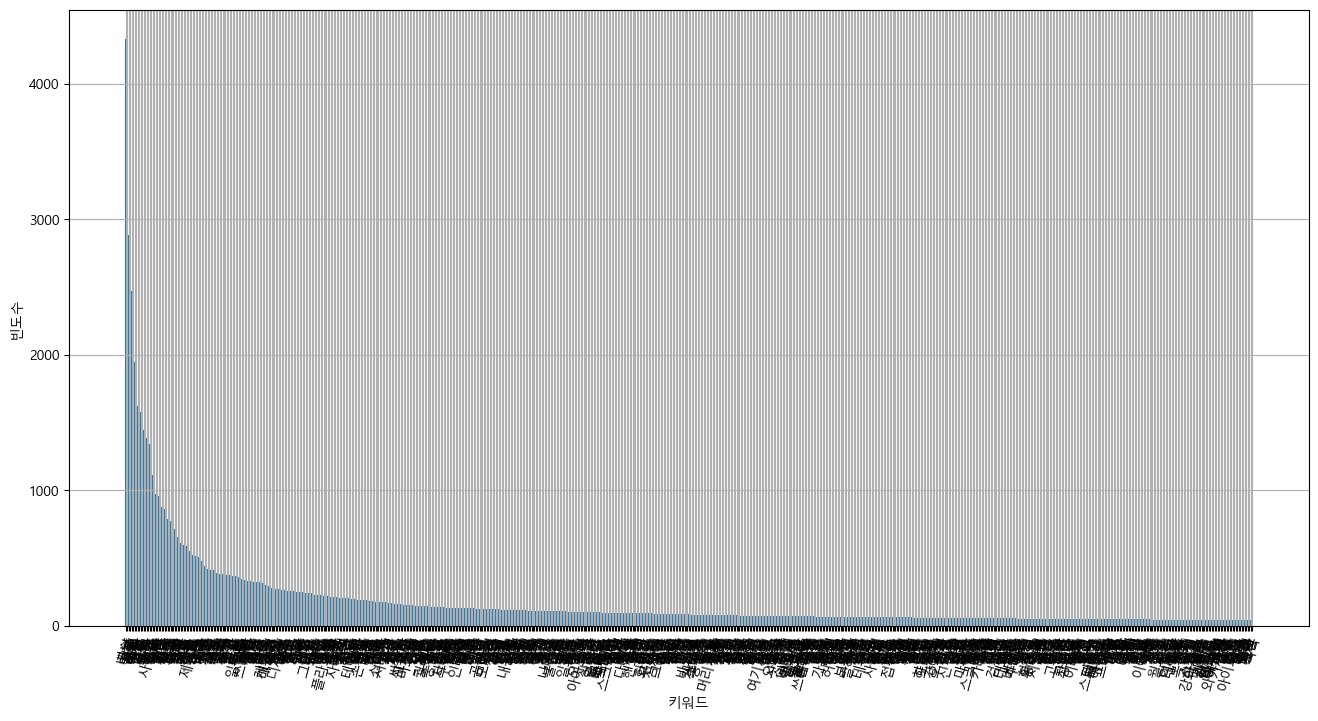

In [41]:
plt.figure(figsize = (16, 8))
plt.xlabel('키워드')
plt.ylabel('빈도수')
plt.grid(True)
sorted_Keys = sorted(word_count, key = word_count.get, reverse = True)
sorted_Values = sorted(word_count.values(), reverse = True)
plt.bar(range(len(word_count)), sorted_Values, align = 'center')
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation = 75)
plt.show()

In [45]:
import re

reviews_list2 = []
for idx, row in ratings_2_data.iterrows(): # DataFrame의 각 행에 접근
    if "reviews" in row.keys():
        cleaned_review = re.sub(r"[^\w]", " ", row["reviews"])
        reviews_list2.append(cleaned_review)

# 하나의 문자열로
reviews2 = " ".join(reviews_list2)

In [47]:
print(reviews2)

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [49]:
nlp = Okt()
message_N = nlp.nouns(reviews2) # 단일 문자열이 아닐 시 오류 발생
message_N #작업 내용 확인용 출력

['택배',
 '엉망',
 '용',
 '집',
 '밑',
 '층',
 '말',
 '선물',
 '용',
 '전달',
 '상품',
 '머그컵',
 '당황',
 '바로',
 '배송',
 '누락',
 '확인',
 '안',
 '바로',
 '선물',
 '큰일',
 '날',
 '배송',
 '다시',
 '생각',
 '계란',
 '때',
 '완전',
 '코팅',
 '보기',
 '실용',
 '생각',
 '진짜',
 '별로',
 '길이',
 '주문',
 '안',
 '별로',
 '보폴',
 '계속',
 '때',
 '지금',
 '안나',
 '전문',
 '속옷',
 '브랜드',
 '위생',
 '팬티',
 '해',
 '밴딩부분',
 '신축',
 '일반',
 '실로',
 '빅사',
 '임',
 '빅사',
 '이즈',
 '벗',
 '때',
 '밴딩부분',
 '때',
 '밴딩',
 '말',
 '베이지',
 '색',
 '구매',
 '약간',
 '살색',
 '화면',
 '빨',
 '컬러',
 '맛',
 '그냥',
 '별루',
 '치',
 '티',
 '치',
 '탛캏타',
 '티',
 '티',
 '티',
 '티',
 '티',
 '치',
 '치',
 '처',
 '치',
 '처',
 '치',
 '려',
 '화장',
 '거품',
 '생기',
 '정력',
 '별로',
 '듯해',
 '채집',
 '통',
 '결착',
 '채집',
 '통',
 '결착',
 '커터칼',
 '결착',
 '부분',
 '모서리',
 '부분',
 '깍',
 '겨우',
 '결착',
 '해당',
 '부분',
 '제품',
 '불량',
 '이슈',
 '전',
 '최소한',
 '테스트',
 '처음',
 '때',
 '의자',
 '때',
 '소리',
 '계속',
 '부직포',
 '테니스공',
 '살껄',
 '산다',
 '거',
 '사서',
 '배송',
 '기사',
 '판매',
 '회사',
 '서비스',
 '면',
 '최악',
 '요',
 '제품',
 '비지',
 '떡',
 '마인드',
 '장사',
 '이익',
 '눈',
 '사용',
 '설치',


In [51]:
count = Counter(message_N)
count

Counter({'배송': 7885,
         '그냥': 6739,
         '좀': 5048,
         '생각': 4975,
         '별로': 4585,
         '제품': 4160,
         '사용': 3994,
         '구매': 3686,
         '맛': 3532,
         '가격': 3433,
         '부분': 3022,
         '개': 2961,
         '주문': 2864,
         '사이즈': 2717,
         '때': 2671,
         '더': 2645,
         '것': 2480,
         '냄새': 2472,
         '상품': 2404,
         '안': 2246,
         '포장': 2240,
         '반품': 2215,
         '요': 2113,
         '거': 1962,
         '하나': 1791,
         '느낌': 1727,
         '조금': 1610,
         '정도': 1578,
         '제': 1536,
         '상태': 1393,
         '교환': 1362,
         '사진': 1347,
         '저': 1340,
         '실망': 1331,
         '다시': 1330,
         '진짜': 1292,
         '정말': 1277,
         '효과': 1183,
         '택배': 1182,
         '다른': 1173,
         '박스': 1171,
         '한번': 1157,
         '걸': 1131,
         '불량': 1109,
         '구입': 1104,
         '물건': 1092,
         '보고': 1052,
         '완전': 1048,
   

In [55]:
word_count = dict()
for tag, counts in count.most_common(200):
    if (len(str(tag)) > 1):
        word_count[tag] = counts
        print("%s : %d" % (tag, counts))

배송 : 7885
그냥 : 6739
생각 : 4975
별로 : 4585
제품 : 4160
사용 : 3994
구매 : 3686
가격 : 3433
부분 : 3022
주문 : 2864
사이즈 : 2717
냄새 : 2472
상품 : 2404
포장 : 2240
반품 : 2215
하나 : 1791
느낌 : 1727
조금 : 1610
정도 : 1578
상태 : 1393
교환 : 1362
사진 : 1347
실망 : 1331
다시 : 1330
진짜 : 1292
정말 : 1277
효과 : 1183
택배 : 1182
다른 : 1173
박스 : 1171
한번 : 1157
불량 : 1109
구입 : 1104
물건 : 1092
보고 : 1052
완전 : 1048
크기 : 1018
마감 : 1018
처음 : 999
조립 : 926
확인 : 903
색상 : 894
디자인 : 839
대비 : 818
계속 : 812
고정 : 805
아이 : 794
이번 : 790
재질 : 710
바로 : 706
신경 : 688
이건 : 685
기분 : 673
자꾸 : 652
시간 : 652
추천 : 650
뚜껑 : 634
설치 : 621
전혀 : 615
문제 : 615
때문 : 615
달라 : 609
후기 : 609
약간 : 608
구멍 : 607
다음 : 601
일단 : 599
처리 : 598
먼지 : 583
잘못 : 582
길이 : 579
제대로 : 576
판매 : 575
연락 : 566
소리 : 563
머리 : 555
세탁 : 527
원래 : 525
거의 : 522
다리 : 519
설명 : 504
쓰기 : 501
사람 : 500
아기 : 500
착용 : 500
작고 : 496
아주 : 496
기대 : 494
접착 : 489
배송비 : 488
금방 : 486
나사 : 481
최악 : 474
케이스 : 468
하루 : 467
비닐 : 466
참고 : 464
커버 : 462
선물 : 460
자체 : 456
커서 : 455
살짝 : 447
바닥 : 444
품질 : 439
역시 : 426
그닥 : 419
엉망 

In [57]:
font_path = "C:/Windows/fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname = font_path).get_name()
matplotlib.rc('font', family = font_name)

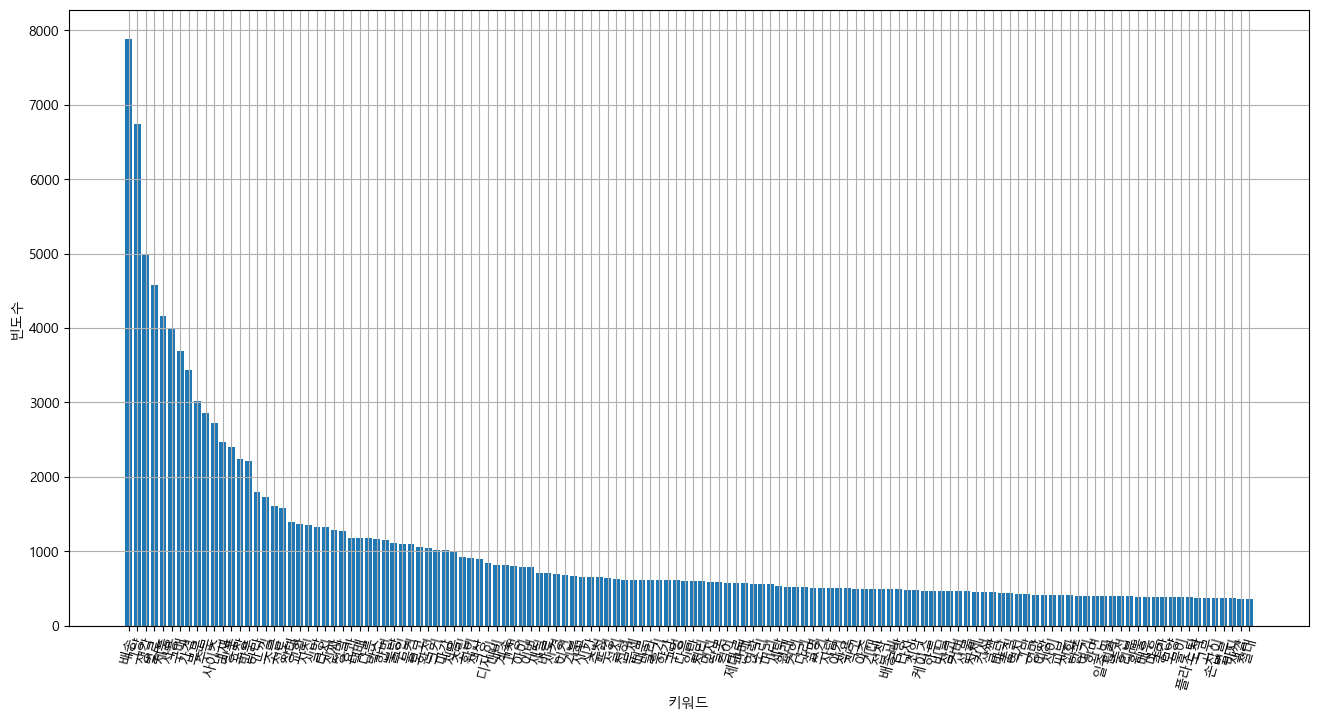

In [59]:
plt.figure(figsize = (16, 8))
plt.xlabel('키워드')
plt.ylabel('빈도수')
plt.grid(True)
sorted_Keys = sorted(word_count, key = word_count.get, reverse = True)
sorted_Values = sorted(word_count.values(), reverse = True)
plt.bar(range(len(word_count)), sorted_Values, align = 'center')
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation = 75)
plt.show()

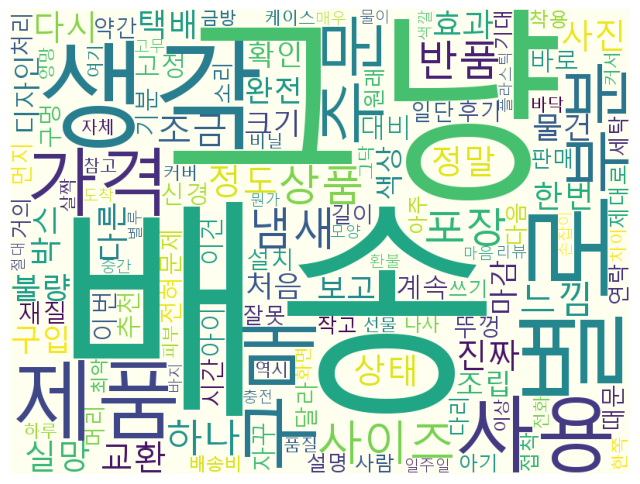

In [61]:
wc = WordCloud(font_path, background_color = 'ivory', width = 800, height = 600)
cloud = wc.generate_from_frequencies(word_count)
plt.figure(figsize = (8, 8))
plt.imshow(cloud)
plt.axis('off')
plt.show()

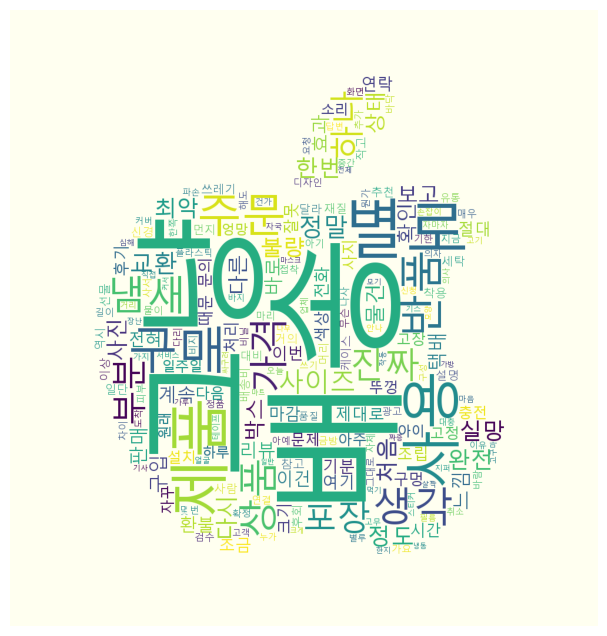

In [43]:
import numpy as np  ### review1
from PIL import Image
masking_image = np.array(Image.open("apple.jpg"))

wc = WordCloud(font_path, background_color = 'ivory', width = 800, height = 600, mask = masking_image)
cloud = wc.generate_from_frequencies(word_count)
plt.figure(figsize = (8, 8))
plt.imshow(cloud)
plt.axis('off')
plt.show()

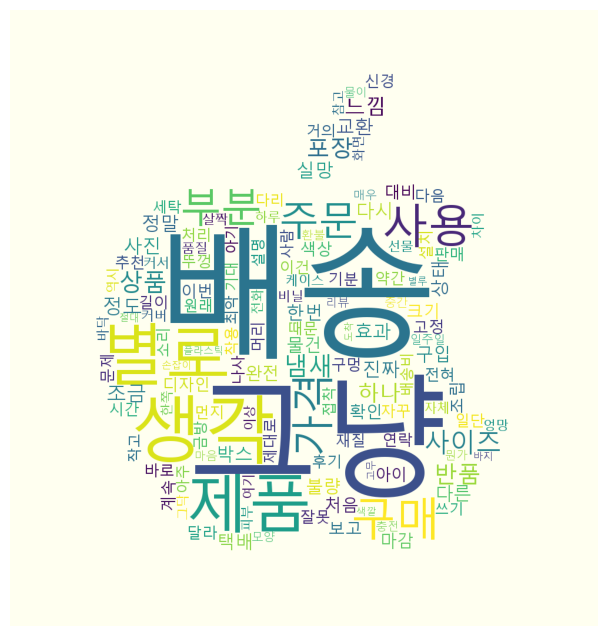

In [63]:
import numpy as np ### review2
from PIL import Image
masking_image = np.array(Image.open("apple.jpg"))

wc = WordCloud(font_path, background_color = 'ivory', width = 800, height = 600, mask = masking_image)
cloud = wc.generate_from_frequencies(word_count)
plt.figure(figsize = (8, 8))
plt.imshow(cloud)
plt.axis('off')
plt.show()

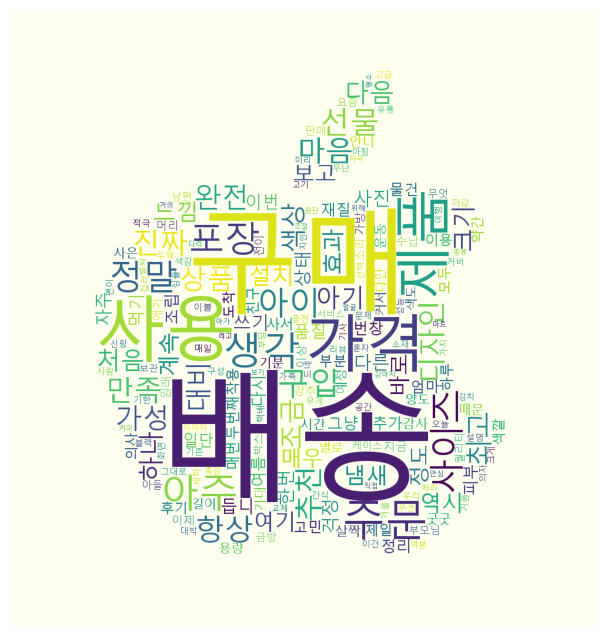

In [76]:
import numpy as np ### review5
from PIL import Image
masking_image = np.array(Image.open("apple.jpg"))

wc = WordCloud(font_path, background_color = 'ivory', width = 800, height = 600, mask = masking_image)
cloud = wc.generate_from_frequencies(word_count)
plt.figure(figsize = (8, 8))
plt.imshow(cloud)
plt.axis('off')
plt.show()

In [65]:
import re

reviews_list5 = []
for idx, row in ratings_5_data.iterrows():
    if "reviews" in row.keys():
        cleaned_review = re.sub(r"[^\w]", " ", row["reviews"])
        reviews_list5.append(cleaned_review)

# Join all reviews into a single string at once
reviews5 = " ".join(reviews_list5)

In [71]:
nlp = Okt()
message_N = nlp.nouns(reviews5)
message_N #작업 내용 확인용 출력

['배공',
 '굿',
 '아주',
 '바지',
 '정말',
 '개',
 '더',
 '구매',
 '가격',
 '대박',
 '바느질',
 '조금',
 '가성',
 '비',
 '최고',
 '민트',
 '색상',
 '옆',
 '손잡이',
 '거',
 '용',
 '도로',
 '사용',
 '사이즈',
 '촉감',
 '무게',
 '감',
 '핏',
 '불',
 '사이즈',
 '친구',
 '향',
 '해',
 '가게',
 '운영',
 '사장',
 '대신',
 '구매',
 '구매',
 '가게',
 '늘',
 '흙',
 '팽이',
 '젤',
 '배송',
 '생각',
 '옵션',
 '파우치',
 '얼마나',
 '구매',
 '사용',
 '선물',
 '준',
 '사람',
 '사람',
 '모두',
 '주문',
 '카페',
 '색도',
 '이불',
 '네이비',
 '색상',
 '조금',
 '굿',
 '역시',
 '보람',
 '제품',
 '이군',
 '이유식',
 '초기',
 '사용',
 '후기',
 '보고',
 '구매',
 '사이즈',
 '실리콘',
 '재질',
 '사이즈',
 '자마자',
 '뎅',
 '저번',
 '삿는데',
 '역시',
 '핸들',
 '때',
 '배송',
 '짱짱',
 '돌뼈',
 '최고',
 '가게',
 '사용',
 '피',
 '때',
 '사이즈',
 '구매',
 '언제',
 '프린트',
 '포인트',
 '보온',
 '기능',
 '짱',
 '최고',
 '강추',
 '시간',
 '접착',
 '그대로',
 '흰색',
 '아기',
 '재질',
 '항상',
 '애용',
 '리뷰',
 '기도',
 '뭐',
 '것',
 '배송',
 '수딩젤',
 '오히려',
 '더',
 '크림',
 '보습',
 '페넬로페',
 '세자',
 '린',
 '제품',
 '구매',
 '세자',
 '린',
 '마지막',
 '팩',
 '전',
 '도착',
 '사이즈',
 '크게',
 '통',
 '아주',
 '강추',
 '센치',
 '토퍼',
 '사용',
 '사이즈',
 '배송',
 '좀',
 '몇번',

In [72]:
count = Counter(message_N)
count

Counter({'배송': 13374,
         '구매': 7979,
         '사용': 5540,
         '가격': 5241,
         '제품': 4346,
         '주문': 4260,
         '더': 3454,
         '맛': 3421,
         '아주': 3394,
         '생각': 3345,
         '것': 3017,
         '때': 2958,
         '또': 2924,
         '포장': 2877,
         '사이즈': 2813,
         '정말': 2732,
         '맘': 2577,
         '아이': 2259,
         '좀': 2205,
         '거': 2179,
         '구입': 2164,
         '선물': 1967,
         '용': 1943,
         '항상': 1905,
         '추천': 1750,
         '만족': 1740,
         '디자인': 1739,
         '진짜': 1709,
         '마음': 1690,
         '가성': 1647,
         '비': 1627,
         '요': 1626,
         '상품': 1621,
         '완전': 1612,
         '최고': 1597,
         '개': 1510,
         '조금': 1403,
         '대비': 1394,
         '향': 1359,
         '굿': 1319,
         '다음': 1305,
         '색상': 1287,
         '하나': 1282,
         '아기': 1207,
         '처음': 1170,
         '크기': 1149,
         '늘': 1122,
         '수': 1114,
     

In [73]:
word_count = dict()
for tag, counts in count.most_common(1000):
    if (len(str(tag)) > 1):
        word_count[tag] = counts
        print("%s : %d" % (tag, counts))

배송 : 13374
구매 : 7979
사용 : 5540
가격 : 5241
제품 : 4346
주문 : 4260
아주 : 3394
생각 : 3345
포장 : 2877
사이즈 : 2813
정말 : 2732
아이 : 2259
구입 : 2164
선물 : 1967
항상 : 1905
추천 : 1750
만족 : 1740
디자인 : 1739
진짜 : 1709
마음 : 1690
가성 : 1647
상품 : 1621
완전 : 1612
최고 : 1597
조금 : 1403
대비 : 1394
다음 : 1305
색상 : 1287
하나 : 1282
아기 : 1207
처음 : 1170
크기 : 1149
설치 : 1057
느낌 : 1055
효과 : 1044
역시 : 1039
냄새 : 1026
계속 : 1024
여기 : 983
바로 : 966
보고 : 943
매우 : 879
정도 : 865
사진 : 847
쓰기 : 782
다른 : 778
걱정 : 766
상태 : 763
한번 : 745
이번 : 739
듭니 : 732
먹기 : 729
자주 : 727
품질 : 722
다시 : 698
조립 : 672
여름 : 671
일단 : 648
피부 : 633
그냥 : 622
정리 : 622
추가 : 607
번창 : 604
재질 : 602
물건 : 602
엄마 : 590
두번째 : 590
매번 : 582
이용 : 579
착용 : 577
고민 : 559
모두 : 553
부분 : 553
하루 : 541
친구 : 525
제일 : 518
사서 : 512
약간 : 502
후기 : 492
도착 : 490
색깔 : 488
의사 : 487
살짝 : 476
때문 : 471
운동 : 465
안나 : 460
감사 : 453
굿굿 : 431
길이 : 429
기분 : 425
용량 : 419
사은 : 414
별로 : 405
시간 : 402
다만 : 399
양도 : 397
색도 : 393
기대 : 393
예정 : 392
커서 : 385
지금 : 384
머리 : 379
이제 : 377
수납 : 376
애기 : 370
가방 : 365
소리 :

In [74]:
font_path = "C:/Windows/fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname = font_path).get_name()
matplotlib.rc('font', family = font_name)

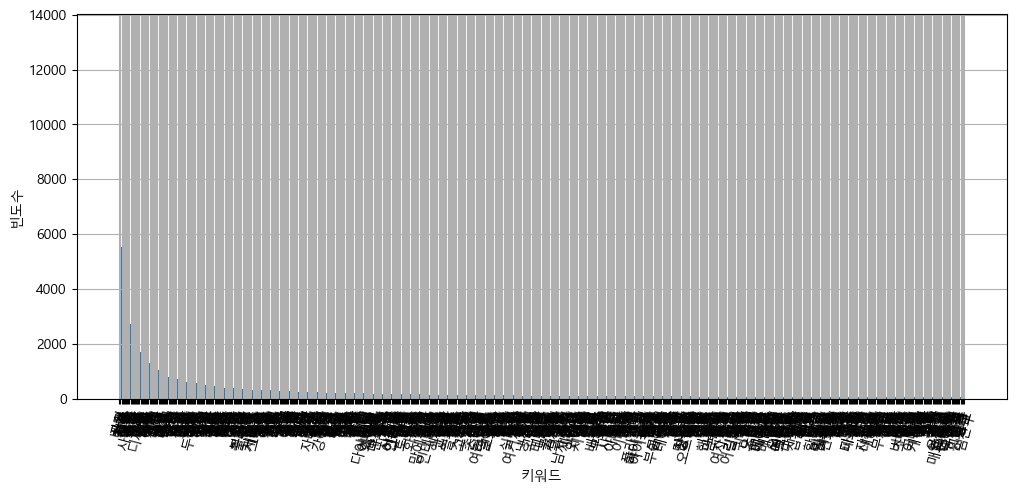

In [75]:
plt.figure(figsize = (12, 5))
plt.xlabel('키워드')
plt.ylabel('빈도수')
plt.grid(True)
sorted_Keys = sorted(word_count, key = word_count.get, reverse = True)
sorted_Values = sorted(word_count.values(), reverse = True)
plt.bar(range(len(word_count)), sorted_Values, align = 'center')
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation = 75)
plt.show()